# 🤖 Notebook 1: Seu Primeiro Chat com IA usando Azure OpenAI

## 📋 O que você vai aprender neste notebook:

1. ✅ O que é Azure OpenAI e como se conectar
2. ✅ Como fazer sua primeira chamada para um modelo de IA
3. ✅ Como personalizar as respostas da IA
4. ✅ Entender os parâmetros importantes (temperature, tokens, etc.)

## ⏱️ Tempo estimado: 15-20 minutos

---

## 🎯 Objetivo

Ao final deste notebook, você será capaz de:
- Conectar-se ao Azure OpenAI Service
- Enviar perguntas para um modelo de IA
- Receber e processar respostas
- Entender como ajustar o comportamento da IA

---

## 🔑 Antes de Começar

**Certifique-se de que você tem:**
- ✓ Uma conta Azure ativa
- ✓ Um recurso Azure OpenAI criado
- ✓ Um modelo deployado (ex: gpt-4, gpt-35-turbo)
- ✓ Suas credenciais no arquivo `.env`

**Se ainda não configurou**, volte ao README.md para instruções detalhadas!

---

## 📸 Onde Encontrar suas Credenciais

Este código usa as informações da tela de **deploy de um modelo** no Azure OpenAI.

**Como chegar lá:**
1. Acesse o [Portal Azure](https://portal.azure.com)
2. Vá até seu recurso Azure OpenAI
3. Clique em "Model deployments" no menu lateral
4. Selecione seu deployment
5. Copie as informações que aparecem na tela

**O que você vai precisar:**
- 🔹 **Endpoint**: URL onde seu modelo está hospedado
- 🔹 **Model name**: Nome do modelo (ex: gpt-4, gpt-35-turbo)
- 🔹 **Deployment name**: Nome que você deu ao deployment
- 🔹 **API Key**: Sua chave de autenticação
- 🔹 **API Version**: Versão da API (ex: "2024-02-15-preview")

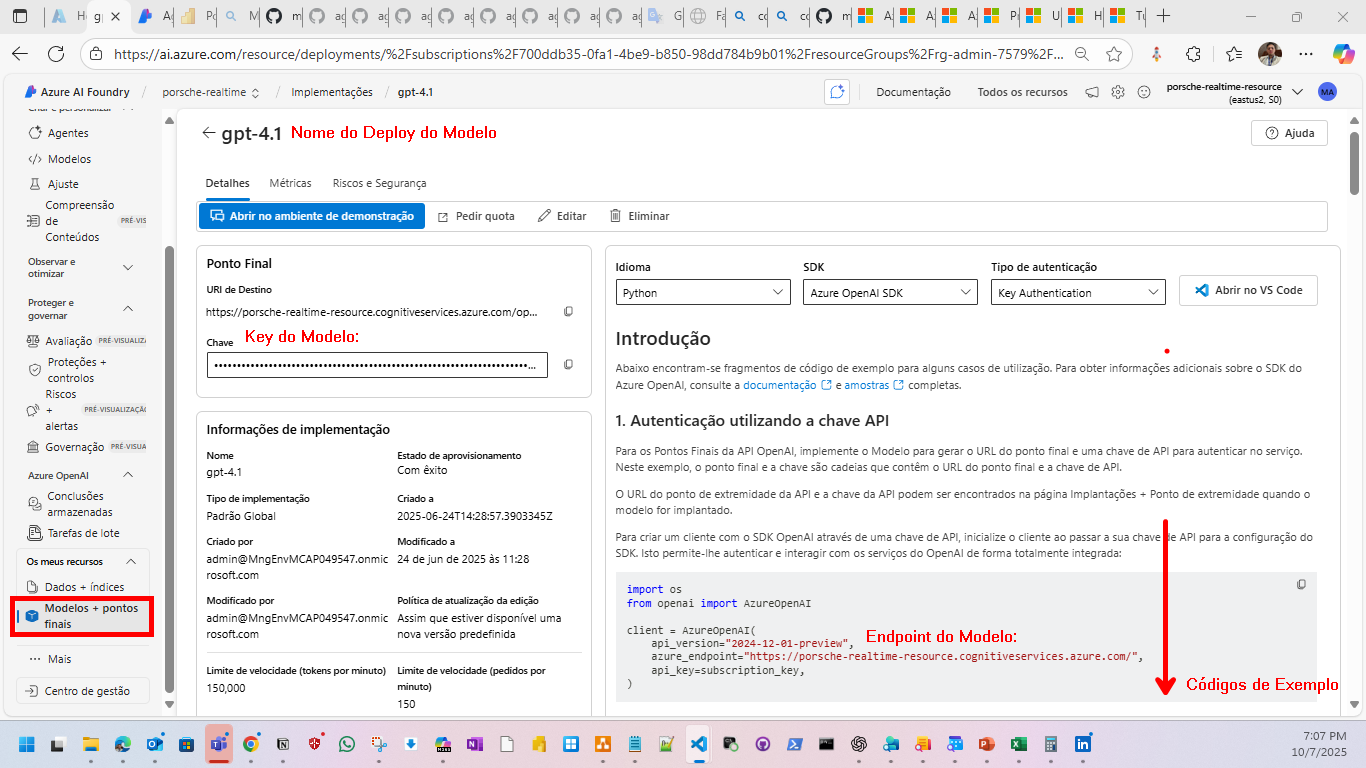

---

## 📦 Passo 1: Importar as Bibliotecas

Primeiro, vamos importar as bibliotecas necessárias:

- **`os`**: Para acessar variáveis de ambiente (onde guardamos nossas credenciais de forma segura)
- **`AzureOpenAI`**: A biblioteca da OpenAI para se conectar com modelos no Azure

**Execute a célula abaixo** (clique nela e pressione Shift+Enter ou clique no botão ▶️)

In [ ]:
import os
from openai import AzureOpenAI

## 🔧 Passo 2: Configurar e Conectar ao Azure OpenAI

Agora vamos:
1. Definir nossas credenciais (endpoint, chave, modelo)
2. Criar um cliente para se conectar com o Azure
3. Fazer nossa primeira pergunta para a IA!

### 📝 O que cada variável faz:

- **`endpoint`**: O endereço (URL) onde seu modelo está hospedado no Azure
- **`model_name`**: O nome do modelo de IA (ex: "gpt-4", "gpt-35-turbo")
- **`deployment`**: O nome que você deu ao seu deployment no Azure
- **`subscription_key`**: Sua chave secreta de API (como uma senha)
- **`api_version`**: A versão da API que estamos usando

### 🤖 Entendendo as Mensagens:

**`role: "system"`**: Define o comportamento da IA
- É como dar instruções de "quem ela deve ser"
- Exemplo: "Você é um assistente útil" ou "Você é um professor de matemática"

**`role: "user"`**: A pergunta que você está fazendo
- É a sua mensagem para a IA
- Pode ser uma pergunta, um pedido, ou qualquer coisa!

**`role: "assistant"`**: A resposta da IA (você vai receber isso de volta)

### ⚙️ Parâmetros Importantes:

- **`max_tokens`**: Número máximo de palavras na resposta (4096 = resposta longa)
- **`temperature`**: Criatividade da IA (0.0 = muito focada, 2.0 = muito criativa)
  - 0.0-0.3: Respostas mais diretas e previsíveis
  - 0.7-1.0: Equilibrado (recomendado)
  - 1.5-2.0: Muito criativo, pode "inventar" mais
- **`top_p`**: Controla a diversidade das palavras (1.0 = máxima diversidade)

**Agora execute a célula abaixo!** ⬇️

In [ ]:
# ========================================
# CONFIGURAÇÃO: Preencha com suas credenciais do Azure
# ========================================
# Você pode pegar essas informações no Portal Azure, na página do seu recurso OpenAI

endpoint = ""  # Cole aqui o endpoint do seu Azure OpenAI (ex: "https://seu-recurso.openai.azure.com/")
model_name = ""  # Nome do modelo (ex: "gpt-4" ou "gpt-35-turbo")
deployment = ""  # Nome do seu deployment no Azure (o nome que você escolheu ao criar)

subscription_key = ""  # Sua chave API (Key 1 ou Key 2 da página "Keys and Endpoint")
api_version = ""  # Versão da API (ex: "2024-02-15-preview")

# ========================================
# CONECTANDO ao Azure OpenAI
# ========================================
# Aqui criamos um "cliente" - é como abrir uma conexão com o modelo de IA
client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=endpoint,
    api_key=subscription_key,
)

# ========================================
# FAZENDO SUA PRIMEIRA PERGUNTA! 🎉
# ========================================
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "Você é um assistente útil e deve responder perguntas de alunas sobre IA",
        },
        {
            "role": "user",
            "content": "O que é Inteligência Artificial?",
        }
    ],
    max_tokens=4096,  # Tamanho máximo da resposta
    temperature=1.0,  # Criatividade (0.0 = focado, 2.0 = muito criativo)
    top_p=1.0,  # Diversidade de palavras
    model=deployment  # Qual modelo usar (o nome do seu deployment)
)

# ========================================
# MOSTRANDO A RESPOSTA
# ========================================
print(response.choices[0].message.content)

## 🎉 Parabéns! Você completou o Notebook 1!

### ✅ O que você aprendeu:

1. Como importar as bibliotecas necessárias
2. Como se conectar ao Azure OpenAI
3. Como estruturar uma conversa com a IA (roles: system, user)
4. Como enviar perguntas e receber respostas
5. O que são e como usar os parâmetros (temperature, max_tokens, top_p)

---

## 🚀 Próximos Passos

### 💡 Experimente Modificar:

1. **Mude a pergunta**: Troque "O que é Inteligência Artificial?" por outra pergunta
2. **Mude o comportamento**: Altere o conteúdo do role "system" para mudar a personalidade da IA
   - Exemplo: "Você é um professor de matemática especialista em explicar conceitos de forma simples"
3. **Brinque com a temperature**:
   - Tente com `temperature=0.0` (respostas mais diretas)
   - Tente com `temperature=2.0` (respostas mais criativas)
4. **Crie uma conversa**: Adicione mais mensagens na lista `messages`

### 📝 Exemplo de Conversa com Múltiplas Mensagens:

```python
messages=[
    {"role": "system", "content": "Você é um professor de Python amigável"},
    {"role": "user", "content": "O que é uma variável?"},
    {"role": "assistant", "content": "Uma variável é como uma caixa onde guardamos informações..."},
    {"role": "user", "content": "E como eu crio uma variável em Python?"}
]
```

---

## 📚 Pronta para o Próximo Desafio?

Agora que você sabe fazer chamadas básicas para IA, vamos ao próximo nível! 🎯

**Abra o notebook:** `criacao_agentes.ipynb`

Lá você vai aprender a:
- Criar agentes especializados
- Dar ferramentas aos agentes
- Orquestrar múltiplos agentes trabalhando juntos

---

## 🆘 Problemas Comuns

### "Authentication failed"
- ✓ Verifique se preencheu todas as variáveis (endpoint, subscription_key, etc.)
- ✓ Certifique-se de que não há espaços extras nas strings

### "Deployment not found"
- ✓ Verifique se o nome do deployment está correto
- ✓ Confirme que o deployment está ativo no Portal Azure

### "Rate limit exceeded"
- ✓ Você fez muitas chamadas muito rápido
- ✓ Aguarde alguns minutos e tente novamente

---

## 📖 Recursos Úteis

- [Documentação Azure OpenAI](https://learn.microsoft.com/azure/ai-services/openai/)
- [Guia de Parâmetros](https://platform.openai.com/docs/api-reference/chat)
- [Melhores Práticas](https://learn.microsoft.com/azure/ai-services/openai/concepts/system-message)

**Bom aprendizado! 🌟**